<div style="text-align:center;display:block">
<b style="color:blue;font-size:200%; font-family:serif">Machine learning</b>

<img src="pythonlogo.jpg" style="margin:0 auto; width:250px">

TC, BN, JBM, AZ
<br>
</div>

<div>
Institut Pasteur, Paris, 20-31 March 2017
</div>




# DBSCAN

DBSCAN = Density-based spatial clustering of applications with noise (DBSCAN). Contrary to k-means it does clustering based on local density. In an nutshell, it packs together datapoints that have a lot of neighbors and it provides outlier points that don't belong to any cluster

the advantages of DBSCAN are:
- find efficiently the number of cluster
- noise can  be defined and its relation to outliers
- can cluster properly "complex shaped data"

the disavantage of DBSCAN as for many clustering alogrithm is high dimentional data.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.datasets import make_circles

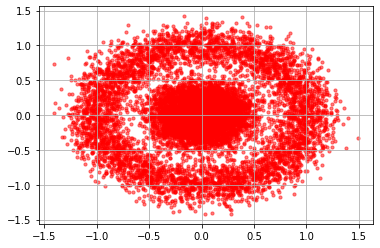

In [41]:
n_samples = 10000
x, y  = make_circles(n_samples=n_samples, factor=0.25,   noise=.15)
plt.scatter(x[:,0], x[:,1], c= 'red', marker = 'o', s=10, alpha=0.5)
plt.grid()
plt.show()

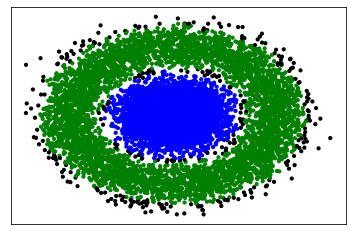

In [53]:
dbscan   = cluster.DBSCAN(eps=.1, min_samples=30)
y_dbscan = dbscan.fit(x)
y_pred = dbscan.labels_.astype(np.int)
colors = np.array([yy for yy in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

plt.scatter(x[:, 0], x[:, 1], color=colors[y_pred].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()

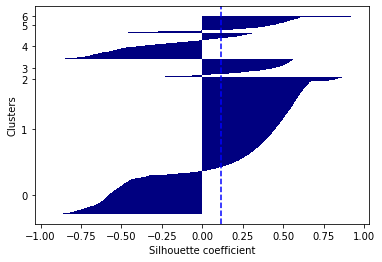

In [51]:
silueta(dbscan.labels_, x)

In [44]:
from sklearn.datasets import make_blobs

x_test, y_test = make_blobs(n_samples=200, n_features=2,
                            centers=5, cluster_std=0.45,
                            shuffle=True)
np.unique(y_test)

array([0, 1, 2, 3, 4])

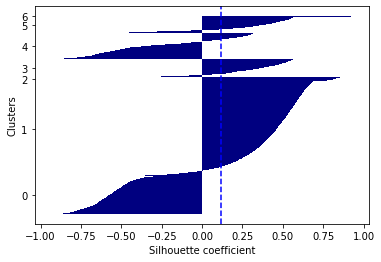

In [52]:
from sklearn.metrics import silhouette_samples
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt

cluster_labels = dbscan.labels_
unique_cluster_labels = np.unique(dbscan.labels_) # np.unique(y)
n_clusters = cluster_labels.shape[0]
silhouette = silhouette_samples(x, cluster_labels,
                                metric='l1')
y_top = 0
y_bottom = 0
y_ticks = []
for i, c in enumerate(unique_cluster_labels):
    c_silhouette = silhouette[cluster_labels == c]
    c_silhouette.sort()
    y_top += len(c_silhouette)
    color = cm.jet(i/n_clusters*1.)
    plt.barh(range(y_bottom, y_top), c_silhouette, height=1,
         edgecolor='none', color=color)
    y_ticks.append((y_top + y_bottom)/2)
    y_bottom += len(c_silhouette)
silhouette_mean = np.mean(silhouette)
plt.axvline(silhouette_mean, color='blue', linestyle='--')
plt.yticks(y_ticks, unique_cluster_labels + 1)
plt.ylabel('Clusters')
plt.xlabel('Silhouette coefficient')
plt.show()

In [49]:
def silueta(labels, x):
    cluster_labels = labels
    unique_cluster_labels = np.unique(labels) # np.unique(y)
    n_clusters = cluster_labels.shape[0]
    silhouette = silhouette_samples(x, labels,
                                    metric='euclidean')
    y_top = 0
    y_bottom = 0
    y_ticks = []
    for i, c in enumerate(unique_cluster_labels):
        c_silhouette = silhouette[cluster_labels == c]
        c_silhouette.sort()
        y_top += len(c_silhouette)
        color = cm.jet(i / n_clusters * 1.)
        plt.barh(range(y_bottom, y_top), c_silhouette, height=1,
             edgecolor='none', color=color)
        y_ticks.append((y_top + y_bottom)/2)
        y_bottom += len(c_silhouette)
    silhouette_mean = np.mean(silhouette)
    plt.axvline(silhouette_mean, color='blue', linestyle='--')
    plt.yticks(y_ticks, unique_cluster_labels + 1)
    plt.ylabel('Clusters')
    plt.xlabel('Silhouette coefficient')
    plt.show()

you can see a clustering that matches the intuitive vision of the points. We can see what k-means would have done 

In [26]:
from sklearn.cluster import KMeans

km    = KMeans(n_clusters=2, init='random', n_init = 5, max_iter = 100, tol = 1e-4, random_state = 0)
y_res = km.fit_predict(x)

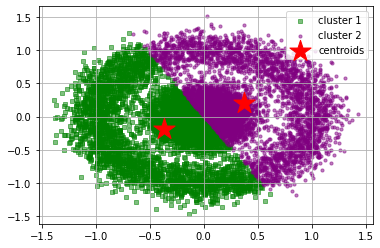

In [30]:
plt.scatter(x[y_res==0,0], x[y_res==0,1], s=10, c='green', marker='s', label = 'cluster 1', alpha=0.5)
plt.scatter(x[y_res==1,0], x[y_res==1,1], s=10, c='purple', marker='o', label = 'cluster 2', alpha=0.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 500, marker= '*', c='red', label= 'centroids')
plt.legend()
plt.grid()
plt.show()

You can see the results is different and does not correspond to the "intuititon"

We can see the evolution of the clustering with the noise

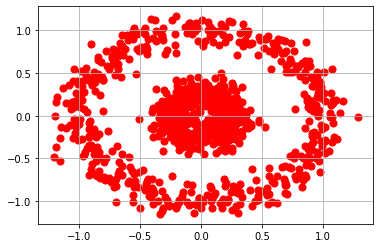

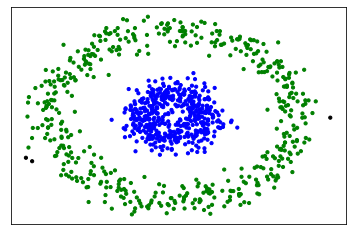

In [39]:
n_samples = 1000
x, y  = make_circles(n_samples=n_samples, factor=.25,   noise=.1)
plt.scatter(x[:,0],x[:,1],c= 'red', marker = 'o', s=50)
plt.grid()
plt.show()

dbscan   = cluster.DBSCAN(eps=.15)
y_dbscan = dbscan.fit(x)
y_pred = dbscan.labels_.astype(np.int)

colors = np.array([yy for yy in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)



plt.scatter(x[:, 0], x[:, 1], color=colors[y_pred].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()



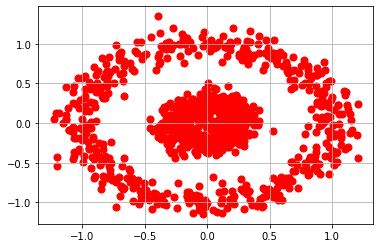

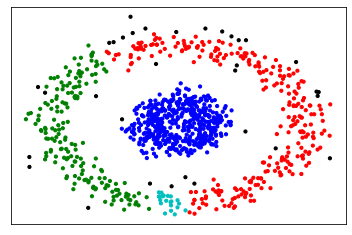

In [40]:
n_samples = 1000
x, y  = make_circles(n_samples=n_samples, factor=.25,   noise=.1)
plt.scatter(x[:,0],x[:,1],c= 'red', marker = 'o', s=50)
plt.grid()
plt.show()

dbscan   = cluster.DBSCAN(eps=.10)
y_dbscan = dbscan.fit(x)
y_pred = dbscan.labels_.astype(np.int)

colors = np.array([yy for yy in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)



plt.scatter(x[:, 0], x[:, 1], color=colors[y_pred].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()


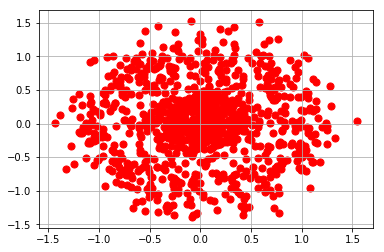

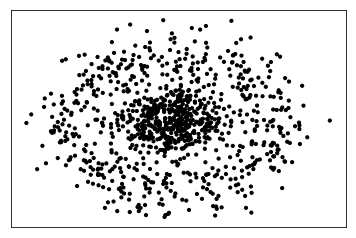

In [8]:
n_samples = 1000
x, y  = make_circles(n_samples=n_samples, factor=.25,   noise=.2)
plt.scatter(x[:,0],x[:,1],c= 'red', marker = 'o', s=50)
plt.grid()
plt.show()

dbscan   = cluster.DBSCAN(eps=.01)
y_dbscan = dbscan.fit(x)
y_pred = dbscan.labels_.astype(np.int)

colors = np.array([yy for yy in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)



plt.scatter(x[:, 0], x[:, 1], color=colors[y_pred].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()

